In [136]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
# importing sys
import sys
# adding Folder_2/subfolder to the system path
sys.path.insert(0, '/Users/glover.co/Documents/laszlo/NetDesign')
import network_design as nd
import time
from matplotlib.colors import to_rgba
import matplotlib.animation as animation
import netrd
from itertools import combinations

In [47]:
O = np.array([[0,2],[2,0]])
X = nd.create_labels(np.array([10,7]))

In [63]:
ex1 = nd.NetAssembly(X,O,X.sum(axis=1,dtype=int),system_energy=1)

In [78]:
ex1.run(1,link_strength=1,folding=True)

In [80]:
ex1.draw(with_networkx=False,color_key=[to_rgba('r'),to_rgba('dodgerblue')],output='figs/folded.png')

<Figure size 500x500 with 0 Axes>

In [16]:
to_rgba('deepskyblue')

(0.0, 0.7490196078431373, 1.0, 1.0)

In [108]:
# g = nx.fast_gnp_random_graph(100, 0.05, directed=False)
# # g = nx.k_core(g,1)
# g = nx.subgraph(g,sorted(list(nx.connected_components(g)),key=len,reverse=True)[0])
X = np.eye(g.number_of_nodes())
O = nd.extract_O(g,X)
new_X = np.vstack((X,X))
random_network = nd.NetAssembly(new_X,O,new_X.sum(axis=0,dtype=int),system_energy=1)
og_g = nd.NetAssembly(new_X,O,new_X.sum(axis=0,dtype=int),system_energy=1)
og_g.g = g

In [86]:
og_g.draw(with_networkx=False,output='figs/og_g.png')

<Figure size 500x500 with 0 Axes>

In [87]:
random_network.run(10000,link_strength=1)

In [109]:
random_network.draw(with_networkx=False,output='figs/soup_random.png')

<Figure size 500x500 with 0 Axes>

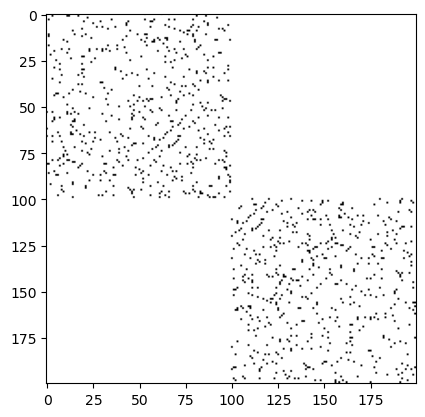

In [93]:
# Sort rows and columns of A by connected components
A = random_network.A
G = nx.from_numpy_array(A)
components = list(nx.connected_components(G))
sorted_indices = []
for component in components:
    sorted_indices += sorted(list(component))
A = A[sorted_indices,:][:,sorted_indices]
plt.imshow(A,cmap='binary')

In [107]:
GM = nx.isomorphism.GraphMatcher(nx.disjoint_union(g,g),random_network.g)
GM.is_isomorphic()

True

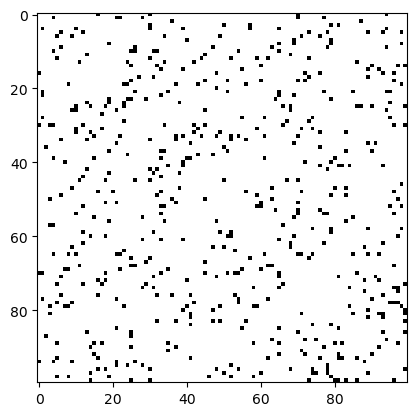

In [111]:
plt.imshow(random_network.O,cmap='binary')
plt.savefig('figs/random_O.png')

True

In [98]:
nx.is_isomorphic?

Signature: nx.is_isomorphic(G1, G2, node_match=None, edge_match=None)
Docstring:
Returns True if the graphs G1 and G2 are isomorphic and False otherwise.

Parameters
----------
G1, G2: graphs
    The two graphs G1 and G2 must be the same type.

node_match : callable
    A function that returns True if node n1 in G1 and n2 in G2 should
    be considered equal during the isomorphism test.
    If node_match is not specified then node attributes are not considered.

    The function will be called like

       node_match(G1.nodes[n1], G2.nodes[n2]).

    That is, the function will receive the node attribute dictionaries
    for n1 and n2 as inputs.

edge_match : callable
    A function that returns True if the edge attribute dictionary
    for the pair of nodes (u1, v1) in G1 and (u2, v2) in G2 should
    be considered equal during the isomorphism test.  If edge_match is
    not specified then edge attributes are not considered.

    The function will be called like

       edge_match(G1[u

In [330]:
g = nx.random_geometric_graph(10,.6)
X = np.eye(g.number_of_nodes())
O = nd.extract_O(g,X)
new_X = np.vstack((X,X))
random_network = nd.NetAssembly(new_X,O,new_X.sum(axis=0,dtype=int),system_energy=1)
og_g = nd.NetAssembly(new_X,O,new_X.sum(axis=0,dtype=int),system_energy=1)
og_g.g = g

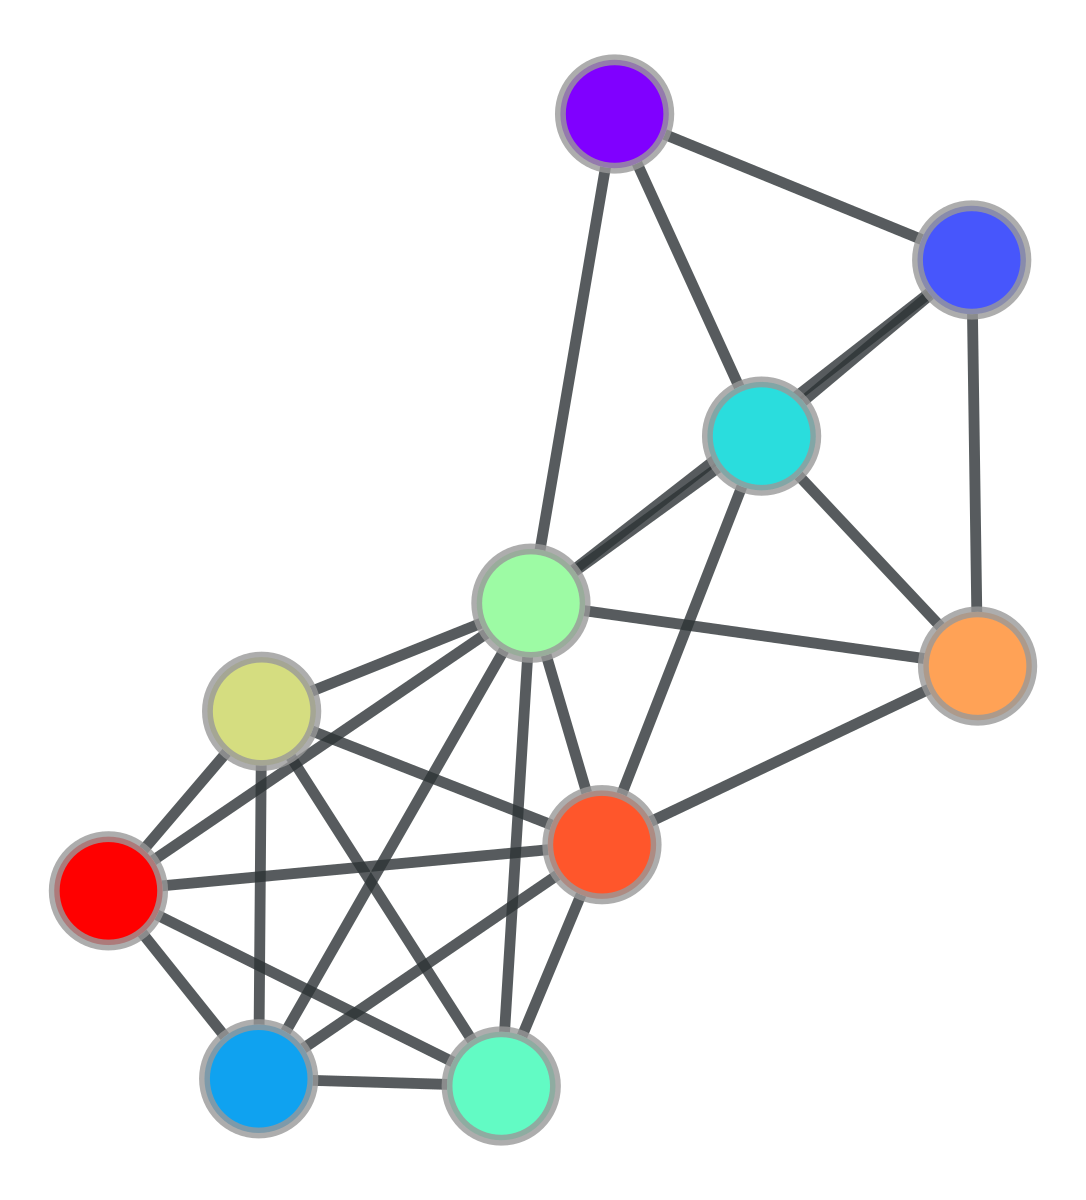

<Figure size 500x500 with 0 Axes>

In [331]:
# og_g.draw(with_networkx=False,output='figs/og_g_rgg.png')
og_g.draw(with_networkx=False)

In [332]:
nd.get_automorphic_groups_nx(g)

[[9, 2, 4, 6], [8], [7], [3], [1], [5], [0]]

In [129]:
dist = netrd.distance.JaccardDistance()

In [333]:
distances = []
pairs_of_automorphisms = nd.get_automorphic_groups_nx(g)[:2]
pairs_to_match = []
for p in pairs_of_automorphisms:
    pairs_to_match.append(list(combinations(p,2)))

In [334]:
pairs_to_match = pairs_to_match[0] + pairs_to_match[1]
pairs_to_match

[(9, 2), (9, 4), (9, 6), (2, 4), (2, 6), (4, 6)]

In [335]:
X = np.eye(g.number_of_nodes())
O = nd.extract_O(g,X)
new_X = np.vstack((X,X))
distances = np.zeros((len(pairs_to_match)+1,100))
og_spectra = nx.laplacian_spectrum(nx.disjoint_union(g,g))


In [336]:
len(np.nonzero(new_X.sum(axis=0))[0])

10

In [337]:
distinct_nodes = []

distinct_nodes.append(len(np.nonzero(new_X.sum(axis=0))[0]))
for i in range(100):
    og_experiment = nd.NetAssembly(new_X,O,new_X.sum(axis=0,dtype=int),system_energy=1)
    og_experiment.run(1000,link_strength=1)
    exp_spectra = nx.laplacian_spectrum(og_experiment.g)
    distances[0,i] = np.linalg.norm(og_spectra-exp_spectra)  
    # og_experiment.draw(with_networkx=False)
for j,p in enumerate(pairs_to_match):
    X[p[0]] = X[p[1]]
    new_X = np.vstack((X,X))
    distinct_nodes.append(len(np.nonzero(new_X.sum(axis=0))[0]))
    O = nd.extract_O(g,new_X)
    for i in range(100):
        og_experiment = nd.NetAssembly(new_X,O,new_X.sum(axis=0,dtype=int),system_energy=1)
        og_experiment.run(1000,link_strength=1)
        exp_spectra = nx.laplacian_spectrum(og_experiment.g)
        distances[j+1,i] = np.linalg.norm(og_spectra-exp_spectra)


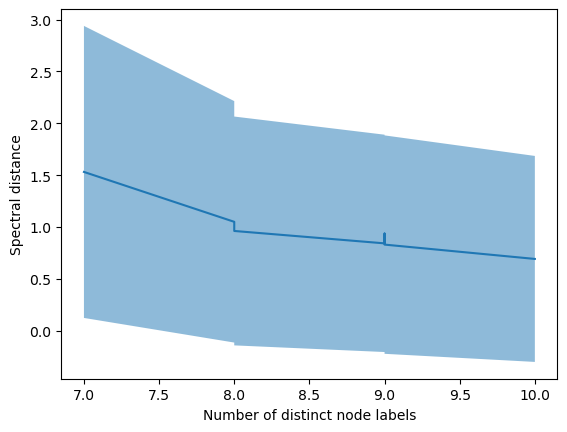

In [338]:
plt.plot(distinct_nodes,distances.mean(axis=1))
plt.fill_between(distinct_nodes,distances.mean(axis=1)-distances.std(axis=1),distances.mean(axis=1)+distances.std(axis=1),alpha=.5)
plt.xlabel('Number of distinct node labels')
plt.ylabel('Spectral distance')
plt.savefig('figs/spectral_distance_rgg.png')
plt.show()


In [339]:
og_experiment.draw(with_networkx=False,output='figs/repeat_particles.png')

<Figure size 500x500 with 0 Axes>

In [262]:
distinct_nodes

[10, 9, 8, 8, 8, 7, 7, 6]

In [257]:
# Reorder nodes based on node label in X
X.sum(axis=0)

array([1., 1., 0., 2., 0., 1., 4., 1., 0., 0.])

In [501]:
g = nx.fast_gnp_random_graph(10, 0.64, directed=False)

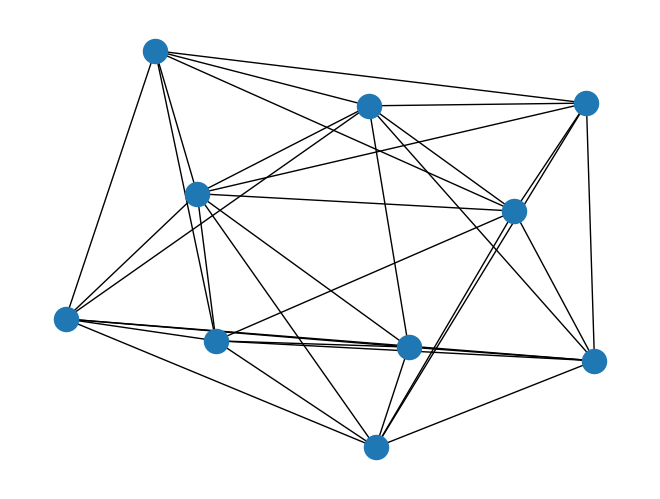

In [502]:
nx.draw(g)

In [509]:
X = np.eye(g.number_of_nodes())
O = nd.extract_O(g,X)
new_X = np.tile(X,reps=(10,1))
distances = np.zeros((len(pairs_to_match)+1,100))
og_spectra = nx.laplacian_spectrum(nx.disjoint_union(g,g))

In [510]:
# Group nodes by degree where the key is the degree and the value is a list of nodes with that degree
degree_dict = {}
for node in g.nodes():
    degree = g.degree(node)
    if degree in degree_dict:
        degree_dict[degree].append(node)
    else:
        degree_dict[degree] = [node]

In [511]:
from itertools import combinations
# create a list of nodes which can share the same label
pairs_to_match = []
for k in degree_dict.keys():
    pairs_to_match += list(combinations(degree_dict[k],2))

In [512]:
distinct_nodes = []
distances = np.zeros((len(pairs_to_match)+1,100))

distinct_nodes.append(len(np.nonzero(new_X.sum(axis=0))[0]))
# for i in range(100):
og_experiment = nd.NetAssembly(new_X,O,new_X.sum(axis=0,dtype=int),system_energy=1)
og_experiment.run(5000,link_strength=.1)
    # exp_spectra = nx.laplacian_spectrum(og_experiment.g)
    # distances[0,i] = np.linalg.norm(og_spectra-exp_spectra)  
    # og_experiment.draw(with_networkx=False)
# for j,p in enumerate(pairs_to_match):
#     X[p[0]] = X[p[1]]
#     new_X = np.vstack((X,X))
#     distinct_nodes.append(len(np.nonzero(new_X.sum(axis=0))[0]))
#     O = nd.extract_O(g,new_X)
#     for i in range(100):
#         og_experiment = nd.NetAssembly(new_X,O,new_X.sum(axis=0,dtype=int),system_energy=1)
#         og_experiment.run(1000,link_strength=1)
#         exp_spectra = nx.laplacian_spectrum(og_experiment.g)
#         distances[j+1,i] = np.linalg.norm(og_spectra-exp_spectra)

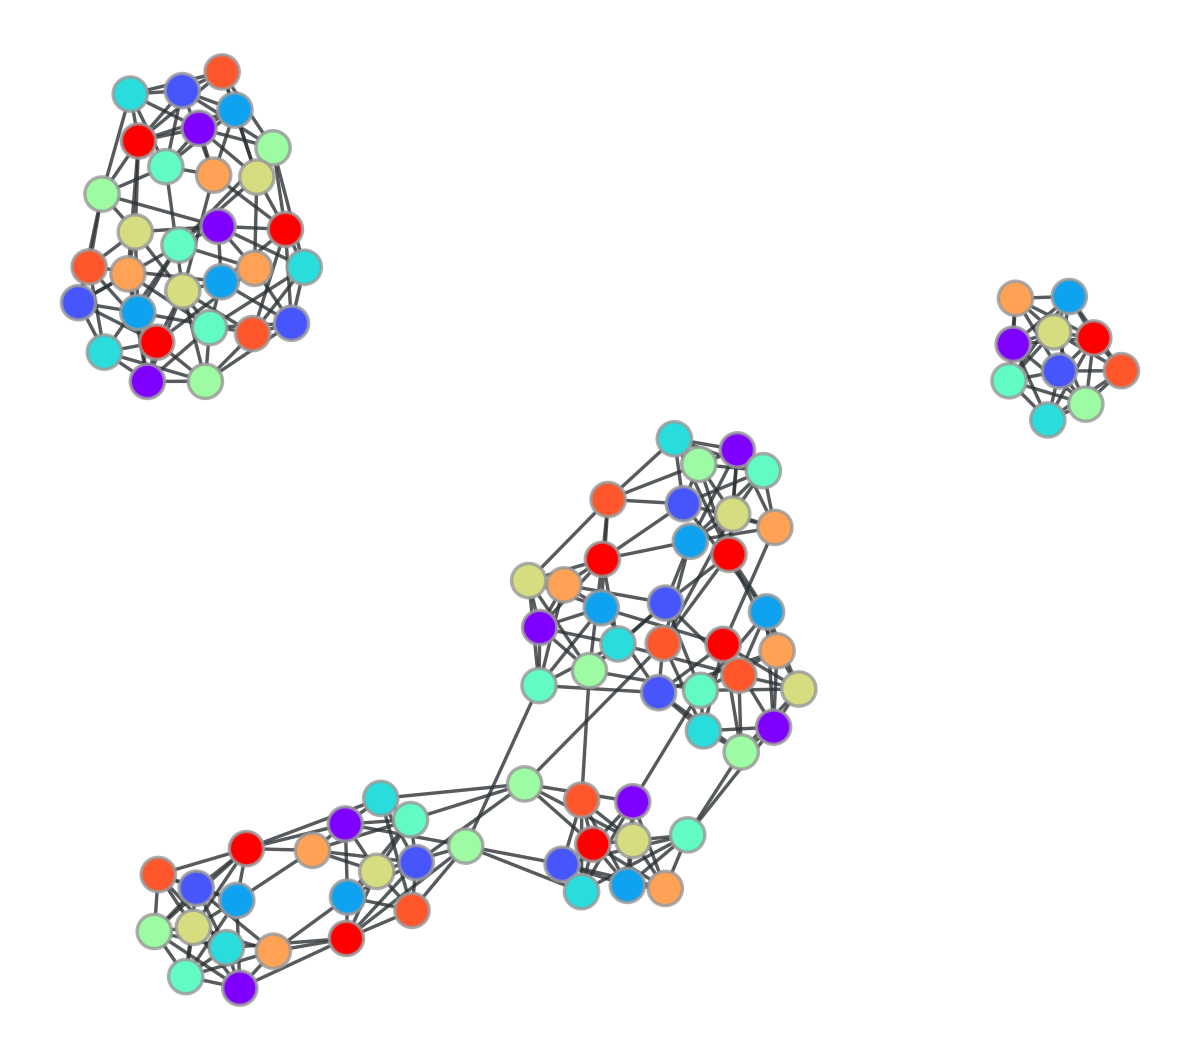

<Figure size 500x500 with 0 Axes>

In [513]:
og_experiment.draw(with_networkx=False)

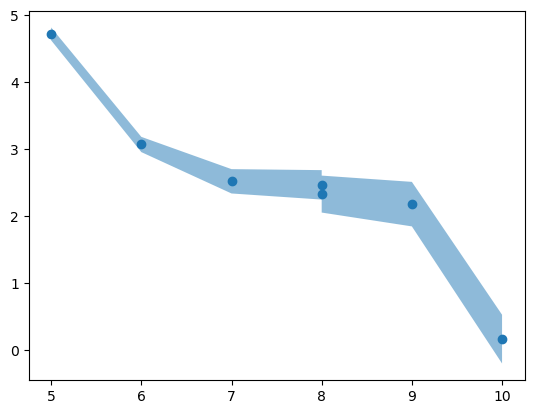

In [355]:
plt.plot(distinct_nodes,distances.mean(axis=1),'o')

plt.fill_between(distinct_nodes,distances.mean(axis=1)-distances.std(axis=1),distances.mean(axis=1)+distances.std(axis=1),alpha=.5)


In [356]:
# Average distances where distinct nodes is the same
avg_dist = []
std_dist = []
for n in np.unique(distinct_nodes):
    avg_dist.append(distances.mean(axis=1)[distinct_nodes==n].mean())
    std_dist.append(distances.std(axis=1)[distinct_nodes==n].std())

In [359]:
og_experiment.draw(with_networkx=False,output='figs/repeated_particles_er.png')

<Figure size 500x500 with 0 Axes>

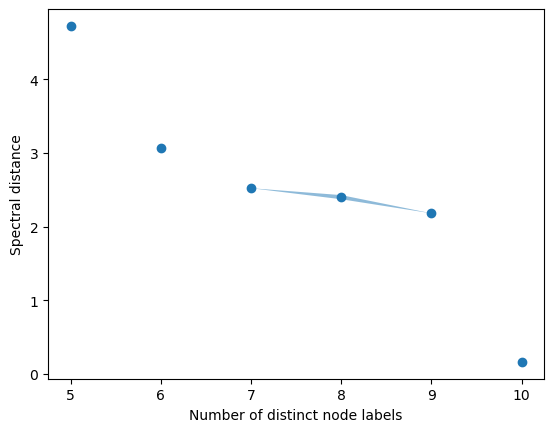

In [357]:
plt.plot(np.unique(distinct_nodes),avg_dist,'o')  
plt.fill_between(np.unique(distinct_nodes),np.array(avg_dist)-np.array(std_dist),np.array(avg_dist)+np.array(std_dist),alpha=.5)
plt.xlabel('Number of distinct node labels')
plt.ylabel('Spectral distance')
plt.savefig('figs/spectral_distance_er.png')
plt.show()

In [361]:
og_g = nd.NetAssembly(np.eye(g.number_of_nodes()),nd.extract_O(g,np.eye(g.number_of_nodes())),np.ones(g.number_of_nodes(),dtype=int))
og_g.g = g

In [363]:
og_g.draw(with_networkx=False,output='er_og_network.png')

<Figure size 500x500 with 0 Axes>

In [364]:
X = np.eye(g.number_of_nodes())
O = nd.extract_O(g,X)
new_X = np.vstack((X,X))
distances = np.zeros((len(pairs_to_match)+1,100))
og_spectra = nx.laplacian_spectrum(nx.disjoint_union(g,g))

In [367]:

og_g = nd.NetAssembly(new_X,O,new_X.sum(axis=0,dtype=int),system_energy=1)
og_g.run(1000,link_strength=1)

In [369]:

og_g.draw(with_networkx=False,output='er_distinct_particles.png')

<Figure size 500x500 with 0 Axes>

In [521]:
# Make a hyperbolic network is networkx
# g = nx.(100,.1)
X = np.eye(g.number_of_nodes())
O = nd.extract_O(g,X)
# new_X = np.vstack((X,X))
new_X = np.tile(X,reps=(10,1))
random_network = nd.NetAssembly(new_X,O,new_X.sum(axis=0,dtype=int),system_energy=1)
og_g = nd.NetAssembly(new_X,O,new_X.sum(axis=0,dtype=int),system_energy=1)
og_g.g = g

Signature:
nx.soft_random_geometric_graph(
    n,
    radius,
    dim=2,
    pos=None,
    p=2,
    p_dist=None,
    seed=None,
)
Docstring:
Returns a soft random geometric graph in the unit cube.

The soft random geometric graph [1] model places `n` nodes uniformly at
random in the unit cube in dimension `dim`. Two nodes of distance, `dist`,
computed by the `p`-Minkowski distance metric are joined by an edge with
probability `p_dist` if the computed distance metric value of the nodes
is at most `radius`, otherwise they are not joined.

Edges within `radius` of each other are determined using a KDTree when
SciPy is available. This reduces the time complexity from :math:`O(n^2)`
to :math:`O(n)`.

Parameters
----------
n : int or iterable
    Number of nodes or iterable of nodes
radius: float
    Distance threshold value
dim : int, optional
    Dimension of graph
pos : dict, optional
    A dictionary keyed by node with node positions as values.
p : float, optional
    Which Minkowski dis

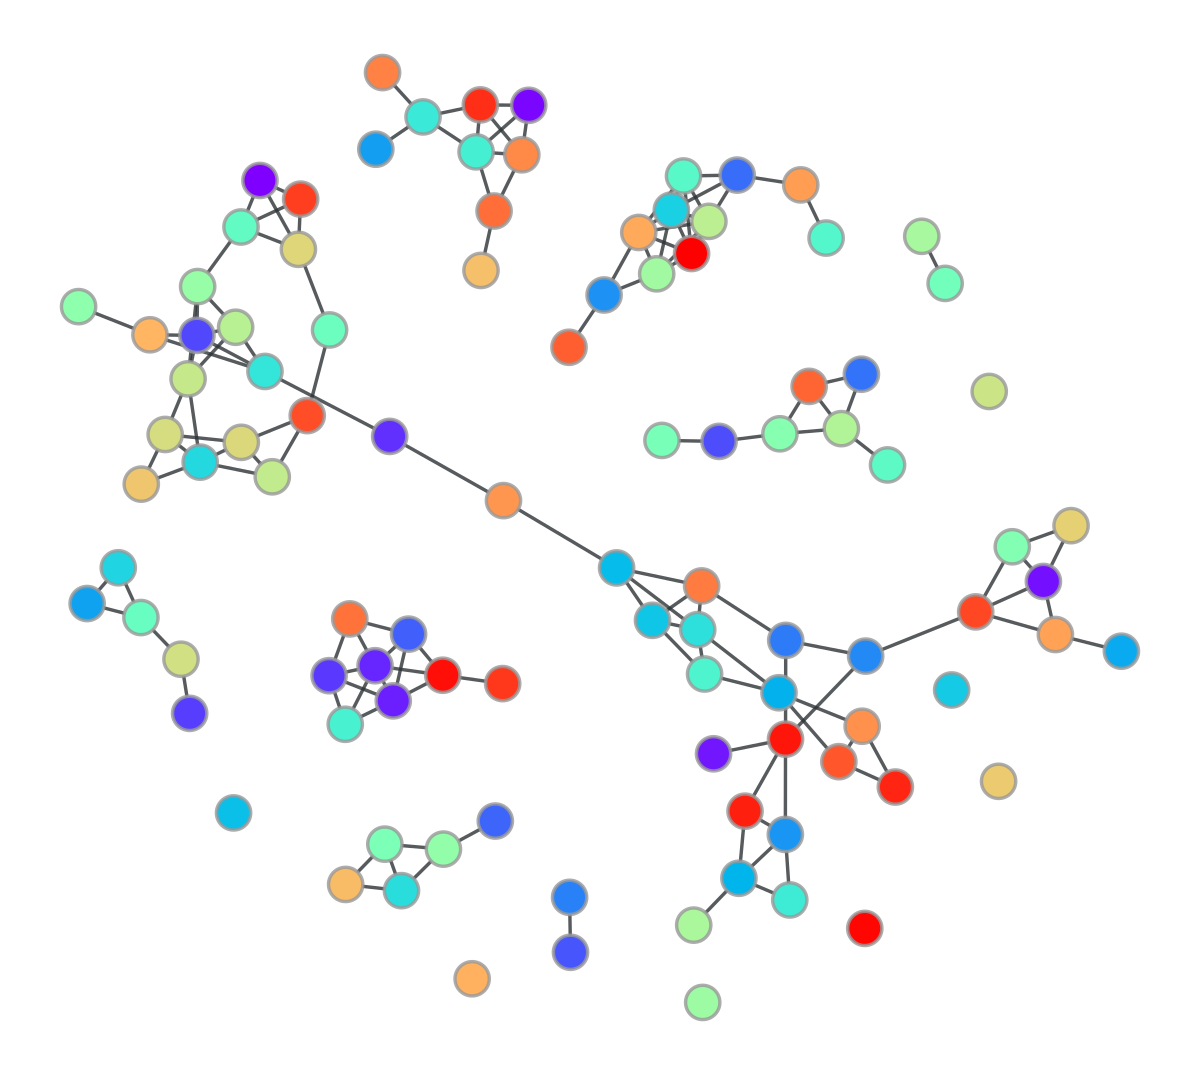

<Figure size 500x500 with 0 Axes>

In [519]:
og_g.draw(with_networkx=False)

In [481]:
distances = []
pairs_of_automorphisms = nd.get_automorphic_groups_nx(g)[:2]
pairs_to_match = []
for p in pairs_of_automorphisms:
    pairs_to_match.append(list(combinations(p,2)))
pairs_to_match

[[],
 [(0, 1),
  (0, 3),
  (0, 4),
  (0, 9),
  (1, 3),
  (1, 4),
  (1, 9),
  (3, 4),
  (3, 9),
  (4, 9)]]

In [490]:
X = np.eye(g.number_of_nodes())
O = nd.extract_O(g,X)
new_X = np.tile(X,reps=(10,1))
distances = np.zeros((len(pairs_to_match)+1,100))
og_spectra = nx.laplacian_spectrum(nx.disjoint_union(g,g))

In [491]:
distinct_nodes = []

distinct_nodes.append(len(np.nonzero(new_X.sum(axis=0))[0]))
# for i in range(100):
og_experiment = nd.NetAssembly(new_X,O,new_X.sum(axis=0,dtype=int),system_energy=1)
og_experiment.run(5000,link_strength=.1)
    # exp_spectra = nx.laplacian_spectrum(og_experiment.g)
    # distances[0,i] = np.linalg.norm(og_spectra-exp_spectra)  
    # og_experiment.draw(with_networkx=False)
# for j,p in enumerate(pairs_to_match):
#     X[p[0]] = X[p[1]]
#     new_X = np.vstack((X,X))
#     distinct_nodes.append(len(np.nonzero(new_X.sum(axis=0))[0]))
#     O = nd.extract_O(g,new_X)
#     for i in range(100):
#         og_experiment = nd.NetAssembly(new_X,O,new_X.sum(axis=0,dtype=int),system_energy=1)
#         og_experiment.run(1000,link_strength=1)
#         exp_spectra = nx.laplacian_spectrum(og_experiment.g)
#         distances[j+1,i] = np.linalg.norm(og_spectra-exp_spectra)

/Users/glover.co/anaconda3/lib/python3.11/site-packages/graph_tool/draw/cairo_draw.py:681: UserWarning: Unknown parameter: with_labels
  warnings.warn("Unknown parameter: " + k, UserWarning)


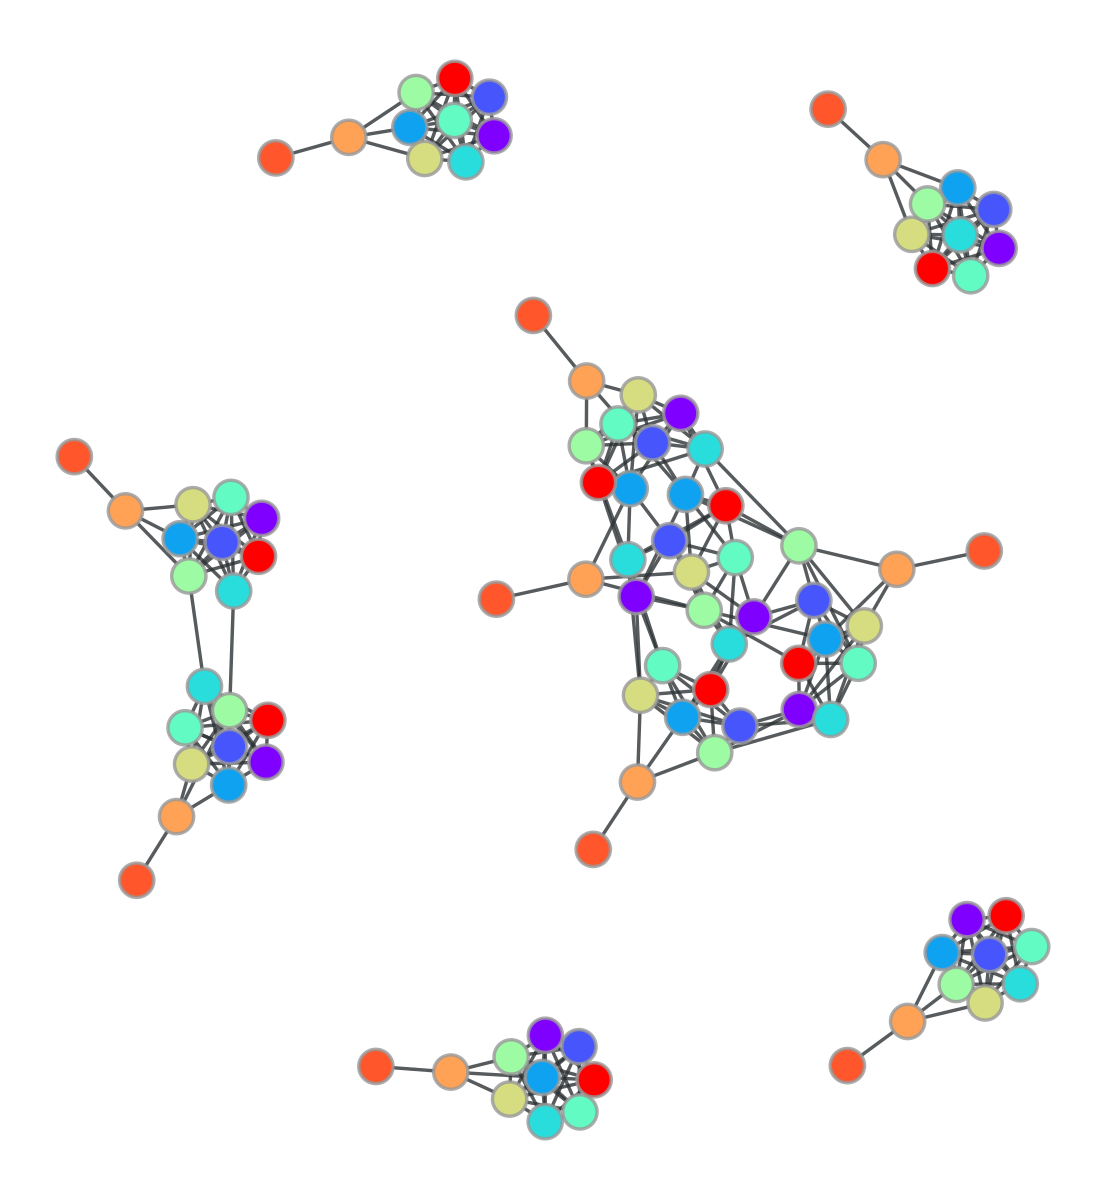

<Figure size 500x500 with 0 Axes>

In [499]:
og_experiment.draw(with_networkx=False,with_labels=False)

In [500]:
2*g.number_of_edges()/(g.number_of_nodes())

6.4

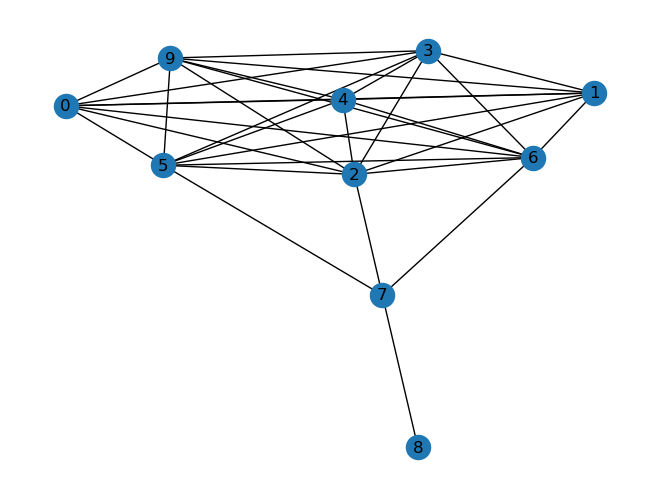

In [495]:
nx.draw(g,with_labels=True)

In [602]:
# Make contour plot in matplotlib
x = np.arange(0,1,.025)
y = np.arange(0,1,.025)
X, Y = np.meshgrid(x,y)
Z = (1*X)**2 + 2*Y**4
Z[Z>1] = 1

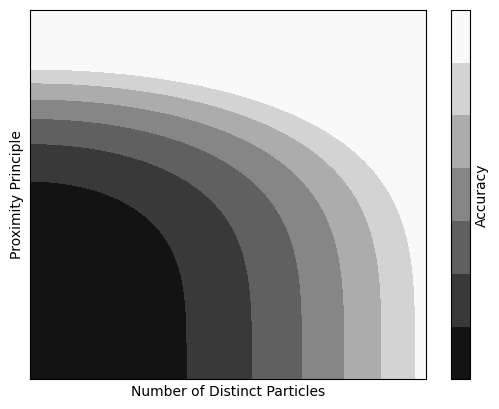

In [604]:
fig, ax = plt.subplots()
CS = ax.contourf(X,Y,Z,cmap='grey',vmax=1)
# ax.
# plt.colorbar(CS,vmax=1)
cbar = plt.colorbar(CS,label='Accuracy')
cbar.ax.tick_params(size=0)
cbar.set_ticks([])
# plt.clim(0,1)
plt.xticks([],[])
plt.yticks([],[])
plt.xlabel('Number of Distinct Particles')
plt.ylabel('Proximity Principle')
plt.savefig('figs/phase_plot.png')
plt.show()